###Dividend Discount Model or Discounted Cashflow Model
$$V_0 = \frac{D_0(1 + g)}{(1 + r)} + \frac{D_0(1 + g)^2}{(1 + r)^2} + ... + \frac{D_0(1 + g)^n}{(1 + r)^n}$$
###Gordon Growth Model
$$V_0 = \frac{D_0(1 + g)}{r - g}$$


In [ ]:
import scipy.stats as sct
import random
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


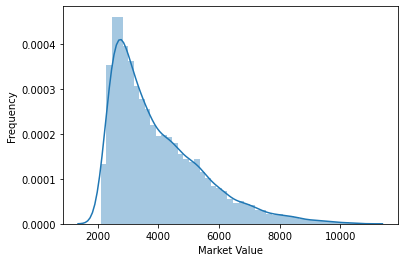

In [ ]:
d0 = 100
data = []

for x in range(10000):
    g = random.uniform(0.05,0.08)
    r = random.uniform(0.09,0.10)
    d1 = d0*(1+g)
    v0 = d1/(r-g)
    data.append(v0)
    
sns.distplot(data)
plt.ylabel('Frequency')
plt.xlabel('Market Value');

In [ ]:
data


[2490.2873338608333,
 5885.031184379368,
 2406.3118584027493,
 4332.849780179714,
 5270.564520878985,
 4424.649952179841,
 2439.4725234285706,
 3387.0565090192276,
 2617.201881443276,
 4281.485438704022,
 4775.813239675963,
 4067.6216446561098,
 2734.299149612976,
 4495.02085030952,
 4375.882055247906,
 3075.4168389643855,
 2692.5194773341937,
 2739.0852366902277,
 3038.5073337443905,
 6478.286331753127,
 2304.872496226944,
 3992.832721402786,
 3794.1696461721212,
 2689.2749870882562,
 2631.1554159283946,
 3652.7747931363047,
 5642.855143623039,
 4426.155203016892,
 5671.974231962049,
 2800.999945681776,
 2858.1883127583137,
 3916.908901377078,
 2840.6623083091317,
 2477.171293802858,
 2683.5512916842017,
 4382.0207584740565,
 3530.003629149131,
 3883.680502398049,
 2327.9134035157886,
 3003.578352385129,
 4094.949327285129,
 3214.4961552667787,
 2486.577354116337,
 3073.796294449019,
 3724.4139505937646,
 4656.846789695673,
 5411.384158369765,
 3308.1833284267896,
 4109.193882154823,


In [ ]:
np.mean(data)


3985.500534677319

In [ ]:
np.median(data)


3555.9236830643654

In [ ]:
np.std(data)


1493.719719451889

In [ ]:
np.max(data)


10643.686529223805

In [ ]:
np.min(data)


2101.3274987424575

In [ ]:
d0 = 100
g_mean = 0.05
g_sd = 0.01

data = []

for x in range(10000):
    g = sct.norm.ppf(random.uniform(0,1),loc=g_mean,scale=g_sd)
    r = 0.10
    d1 = d0*(1+g)
    v0 = d1/(r-g)
    data.append(v0)

Text(0.5, 0, 'Market Value')

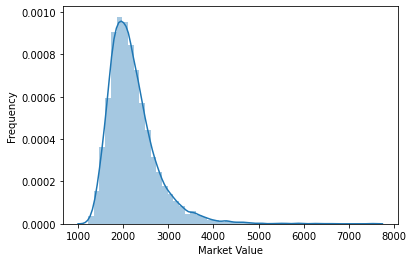

In [ ]:
sns.distplot(data)
plt.ylabel('Frequency')
plt.xlabel('Market Value')

In [ ]:
np.mean(data)


2206.3081550861407

In [ ]:
np.median(data)


2103.09087149883

In [ ]:
np.std(data)


544.3652385200785

In [ ]:
np.max(data)


7519.1029420654495

In [ ]:
np.min(data)


1223.4910222445333

H-Model
$$V_0 = \frac{D_0(1 + g_L)}{r - g_L} + \frac{D_0H(g_S - g_L)}{r - g_L}$$
$$V_0 = \frac{D_0(1 + g_L) + D_0H(g_S - g_L)}{r - g_L}$$

In [ ]:
d0 = 163
gL_mean = 0.025
gL_sd = 0.00001
gS_mean = -0.05
gS_sd = 0.00001
r = 0.08
n = 10
H = n/2

data = []

for x in range(10000):
    gL = sct.norm.ppf(random.uniform(0,1),loc=gL_mean,scale=gL_sd)
    gS = sct.norm.ppf(random.uniform(0,1),loc=gS_mean,scale=gS_sd)

    vS = (d0*H*(gS-gL))/(r-gL)
    vL = (d0*(1+gL))/(r-gL)
    v0 = vS + vL
    data.append(v0)

Text(0.5, 0, 'Market Value')

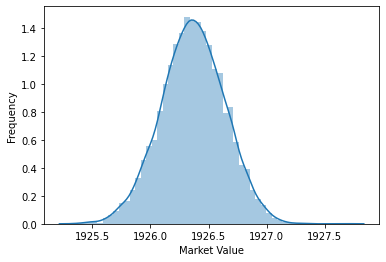

In [ ]:
sns.distplot(data)
plt.ylabel('Frequency')
plt.xlabel('Market Value')

In [ ]:
np.mean(data)


1926.3652812743262

In [ ]:
np.std(data)


0.2737198255074576

In [ ]:
np.max(data)


1927.6997769085099

In [ ]:
np.min(data)


1925.353287877415

###3 Stage Model


Text(0.5, 0, 'Market Value')

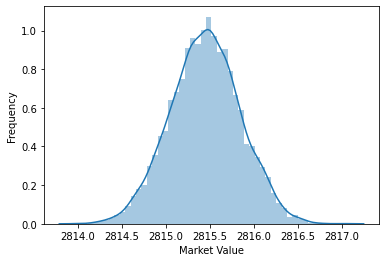

In [ ]:
d0 = 163
gL_mean = 0.025
gL_sd = 0.00001
gS1_mean = -0.05
gS1_sd = 0.00001
gS2_mean = 0.025
gS2_sd = 0.00001

r = 0.08
n = 10
H = n/2

data = []

for x in range(10000):
    gL = sct.norm.ppf(random.uniform(0,1),loc=gL_mean,scale=gL_sd)
    gS1 = sct.norm.ppf(random.uniform(0,1),loc=gS_mean,scale=gS_sd)
    gS2 = sct.norm.ppf(random.uniform(0,1),loc=gS2_mean,scale=gS2_sd)
    
    d1 = d0*(1+gS1)
    
    v1 = (d1)/(1+r)
    
    vS = (d1*H*(gS2-gL))/(r-gL)
    
    vL = (d1*(1+gL))/(r-gL)
    
    v2 = (vS + vL)/(1+r)
    
    v0 = v1 + v2
    data.append(v0)
    
sns.distplot(data)
plt.ylabel('Frequency')
plt.xlabel('Market Value')

In [ ]:
np.mean(data)


2815.4510563398944

In [ ]:
np.std(data)


0.3985340941076607

In [ ]:
np.max(data)


2817.052067252672

In [ ]:
np.min(data)


2813.9910024113337